<a href="https://colab.research.google.com/github/JawDri/INSE6220-Course-Project-/blob/main/Project_Classification_with_PyCaret_Jawher_DRIDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Binary Classification with PyCaret**
Binary classification is a supervised machine learning technique where we classify samples into two classes.

**Install Pycaret**

In [47]:
# install slim version (default)
!pip install pycaret==2.3.6

In [48]:
#Run the below code to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The used data set in this project is the breast cancer Wisconsin (diagnostic) data set. The data contains 32 variables and 569 instances of benign and malignant tumours. The considered breast cancer Wisconsin data set is unbalanced. Indeed, 37% of the instances are malignant cancer and 63% are benign cancer.


Dataset features:

For the considered data set, we have selected 8 variables that have a correlation with the target (diagnosis) greater than 70%:
1. radius mean
2. perimeter mean
3. area mean
4. concave points mean
5. concave points worst
6. area worst
7. perimeter worst
8. radius worst

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?select=breast-cancer.csv

In [51]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/JawDri/INSE6220-Course-Project-/main/breast-cancer.csv')
df.head(10)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   
5  ...         15.47          23.75           103.40       741.6   
6  ...         22.88          27.66           153.20      1606.0   
7  ...         17.06          28.14           110.60       897.0   
8  ...         15.49          30.73           106.20       739.3   
9  ...         15.09          40.68            97.65       711.4   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  
5          0.3985                  0.12440  
6          0.3063                  0.08368  
7          0.3196                  0.11510  
8          0.4378                  0.10720  
9          0.4366                  0.20750  

[10 rows x 32 columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [53]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [54]:
#convert the target from object type to float type
df.loc[df['diagnosis'] == 'M', ['diagnosis']] = 1
df.loc[df['diagnosis'] == 'B', ['diagnosis']] = 0
df.diagnosis = df.diagnosis.astype(np.float)
#remove useless features
df = df.drop(['id'], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


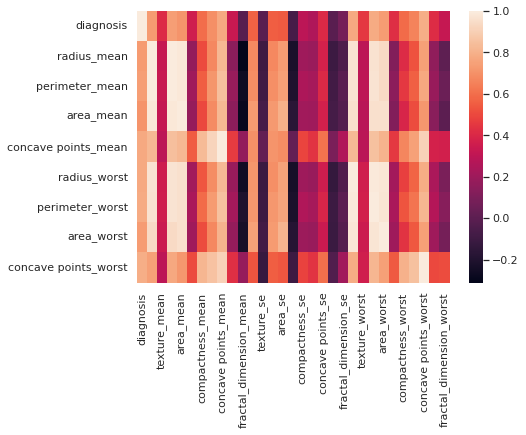

In [55]:
#determine the features with correlation greater than 70% with the target (diagnosis)
sns.heatmap(df.corr()[df.corr().diagnosis >= 0.7], annot= False)

In [56]:
#locate the desired features and remove the features that are correlated less than 70% with the target (diagnosis)
df = df.iloc[:, [0,1,3,4,8,28,24,23,21]]

In [57]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [58]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [59]:
df.head(10)

diagnosis  radius_mean  perimeter_mean  area_mean  concave points_mean  \
0        1.0        17.99          122.80     1001.0              0.14710   
1        1.0        20.57          132.90     1326.0              0.07017   
2        1.0        19.69          130.00     1203.0              0.12790   
3        1.0        11.42           77.58      386.1              0.10520   
4        1.0        20.29          135.10     1297.0              0.10430   
5        1.0        12.45           82.57      477.1              0.08089   
6        1.0        18.25          119.60     1040.0              0.07400   
7        1.0        13.71           90.20      577.9              0.05985   
8        1.0        13.00           87.50      519.8              0.09353   
9        1.0        12.46           83.97      475.9              0.08543   

   concave points_worst  area_worst  perimeter_worst  radius_worst  
0                0.2654      2019.0           184.60         25.38  
1                0.1860      1956.0           158.80         24.99  
2                0.2430      1709.0           152.50         23.57  
3                0.2575       567.7            98.87         14.91  
4                0.1625      1575.0           152.20         22.54  
5                0.1741       741.6           103.40         15.47  
6                0.1932      1606.0           153.20         22.88  
7                0.1556       897.0           110.60         17.06  
8                0.2060       739.3           106.20         15.49  
9                0.2210       711.4            97.65         15.09

**Exploratory Data Analysis**

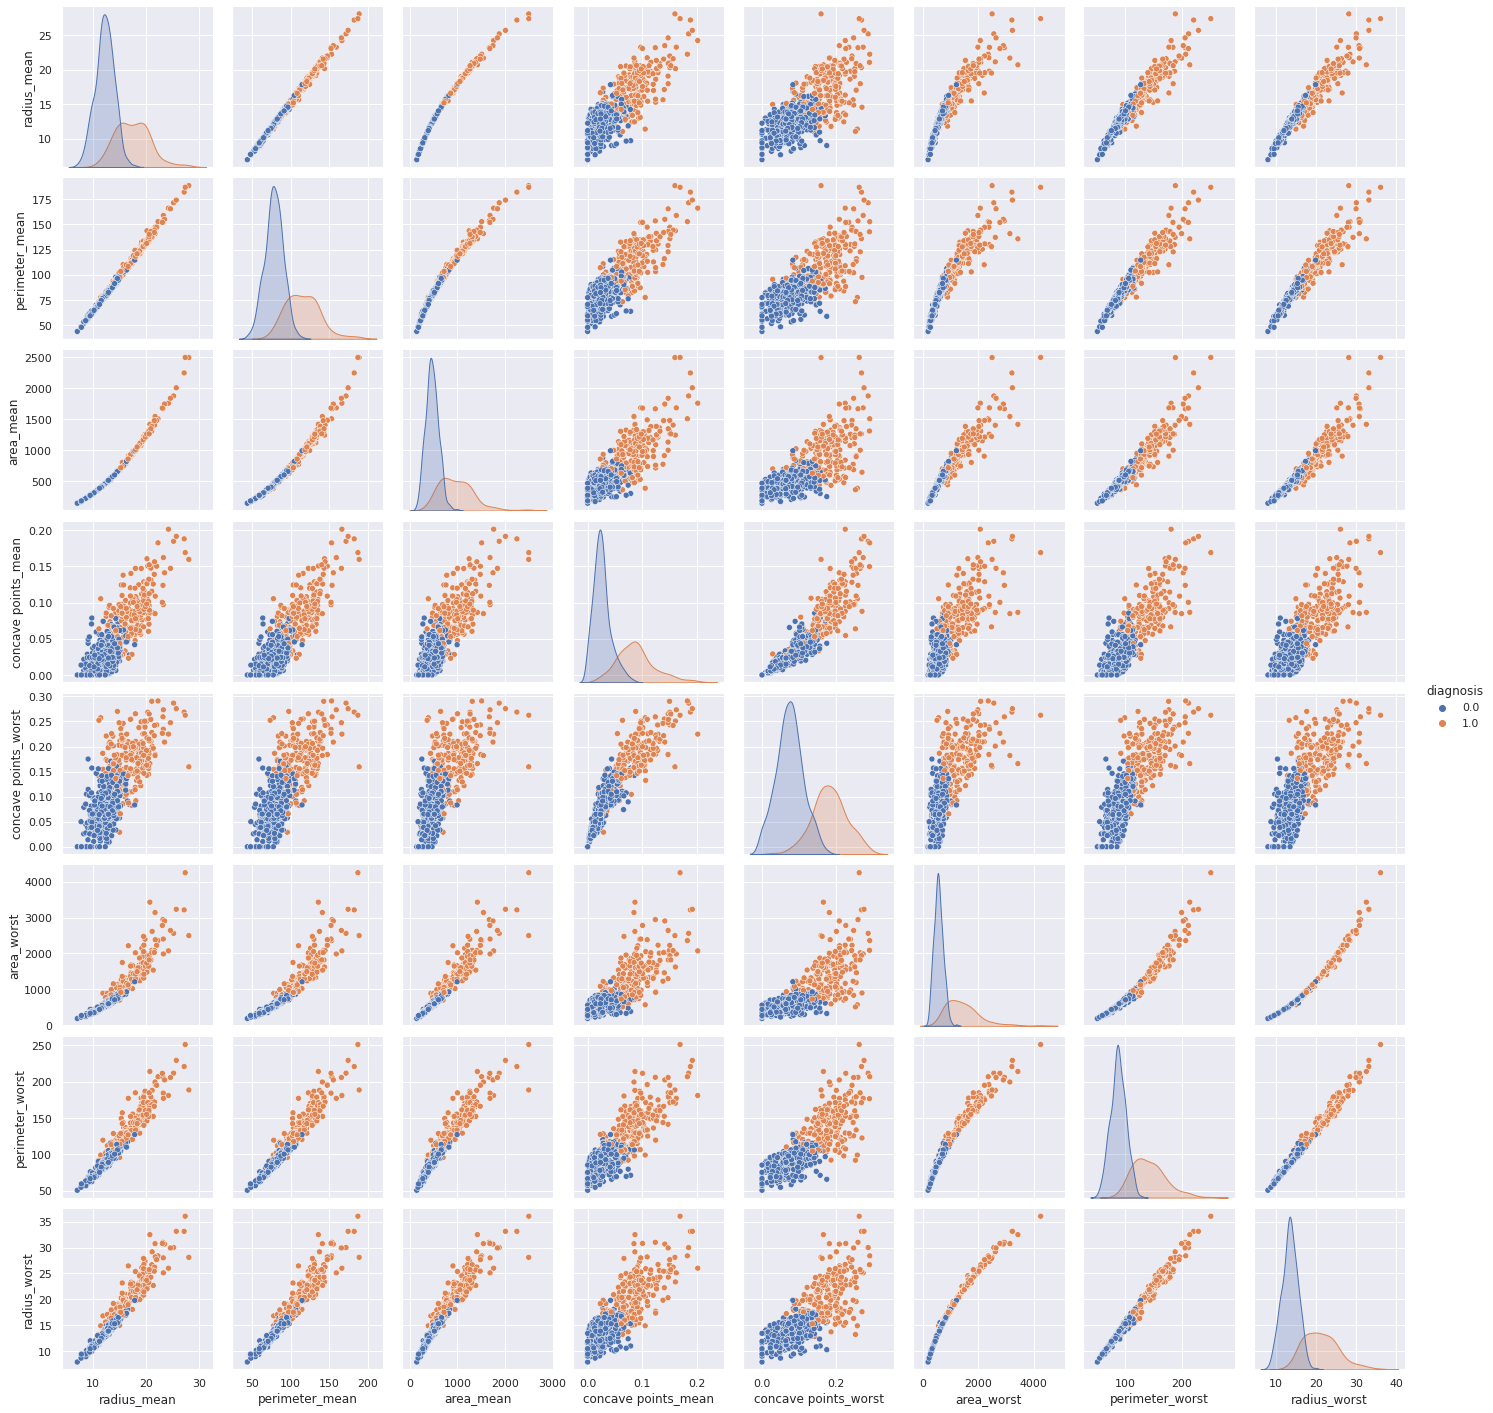

In [60]:
sns.pairplot(df, hue='diagnosis')
plt.show()

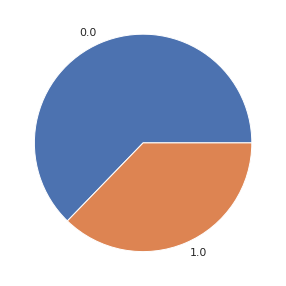

In [61]:
y =df['diagnosis']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [62]:
X = df.drop(columns=['diagnosis'])
X.head(10)

radius_mean  perimeter_mean  area_mean  concave points_mean  \
0        17.99          122.80     1001.0              0.14710   
1        20.57          132.90     1326.0              0.07017   
2        19.69          130.00     1203.0              0.12790   
3        11.42           77.58      386.1              0.10520   
4        20.29          135.10     1297.0              0.10430   
5        12.45           82.57      477.1              0.08089   
6        18.25          119.60     1040.0              0.07400   
7        13.71           90.20      577.9              0.05985   
8        13.00           87.50      519.8              0.09353   
9        12.46           83.97      475.9              0.08543   

   concave points_worst  area_worst  perimeter_worst  radius_worst  
0                0.2654      2019.0           184.60         25.38  
1                0.1860      1956.0           158.80         24.99  
2                0.2430      1709.0           152.50         23.57  
3                0.2575       567.7            98.87         14.91  
4                0.1625      1575.0           152.20         22.54  
5                0.1741       741.6           103.40         15.47  
6                0.1932      1606.0           153.20         22.88  
7                0.1556       897.0           110.60         17.06  
8                0.2060       739.3           106.20         15.49  
9                0.2210       711.4            97.65         15.09

In [63]:
X.describe().transpose()

count        mean         std      min        25%  \
radius_mean           569.0   14.127292    3.524049    6.981   11.70000   
perimeter_mean        569.0   91.969033   24.298981   43.790   75.17000   
area_mean             569.0  654.889104  351.914129  143.500  420.30000   
concave points_mean   569.0    0.048919    0.038803    0.000    0.02031   
concave points_worst  569.0    0.114606    0.065732    0.000    0.06493   
area_worst            569.0  880.583128  569.356993  185.200  515.30000   
perimeter_worst       569.0  107.261213   33.602542   50.410   84.11000   
radius_worst          569.0   16.269190    4.833242    7.930   13.01000   

                            50%        75%        max  
radius_mean            13.37000    15.7800    28.1100  
perimeter_mean         86.24000   104.1000   188.5000  
area_mean             551.10000   782.7000  2501.0000  
concave points_mean     0.03350     0.0740     0.2012  
concave points_worst    0.09993     0.1614     0.2910  
area_worst            686.50000  1084.0000  4254.0000  
perimeter_worst        97.66000   125.4000   251.2000  
radius_worst           14.97000    18.7900    36.0400

**Standardize the Data**

In [64]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

radius_mean  perimeter_mean  area_mean  concave points_mean  \
0     1.097064        1.269934   0.984375             2.532475   
1     1.829821        1.685955   1.908708             0.548144   
2     1.579888        1.566503   1.558884             2.037231   
3    -0.768909       -0.592687  -0.764464             1.451707   
4     1.750297        1.776573   1.826229             1.428493   
5    -0.476375       -0.387148  -0.505650             0.824656   
6     1.170908        1.138125   1.095295             0.646935   
7    -0.118517       -0.072867  -0.218965             0.281950   
8    -0.320167       -0.184080  -0.384207             1.150692   
9    -0.473535       -0.329482  -0.509063             0.941760   

   concave points_worst  area_worst  perimeter_worst  radius_worst  
0              2.296076    2.001237         2.303601      1.886690  
1              1.087084    1.890489         1.535126      1.805927  
2              1.955000    1.456285         1.347475      1.511870  
3              2.175786   -0.550021        -0.249939     -0.281464  
4              0.729259    1.220724         1.338539      1.298575  
5              0.905888   -0.244320        -0.115009     -0.165498  
6              1.196716    1.275220         1.368325      1.368983  
7              0.624196    0.028859         0.099449      0.163763  
8              1.391616   -0.248363        -0.031609     -0.161357  
9              1.620015   -0.297409        -0.286278     -0.244190

In [65]:
X.describe().transpose()

count          mean      std       min       25%  \
radius_mean           569.0 -1.256562e-16  1.00088 -2.029648 -0.689385   
perimeter_mean        569.0 -1.272171e-16  1.00088 -1.984504 -0.691956   
area_mean             569.0 -1.900452e-16  1.00088 -1.454443 -0.667195   
concave points_mean   569.0 -8.780323e-17  1.00088 -1.261820 -0.737944   
concave points_worst  569.0  3.203842e-16  1.00088 -1.745063 -0.756400   
area_worst            569.0 -2.848727e-17  1.00088 -1.222423 -0.642136   
perimeter_worst       569.0 -4.015534e-16  1.00088 -1.693361 -0.689578   
radius_worst          569.0 -7.956924e-16  1.00088 -1.726901 -0.674921   

                           50%       75%       max  
radius_mean          -0.215082  0.469393  3.971288  
perimeter_mean       -0.235980  0.499677  3.976130  
area_mean            -0.295187  0.363507  5.250529  
concave points_mean  -0.397721  0.646935  3.927930  
concave points_worst -0.223469  0.712510  2.685877  
area_worst           -0.341181  0.357589  5.930172  
perimeter_worst      -0.285980  0.540279  4.287337  
radius_worst         -0.269040  0.522016  4.094189

**Observations and variables**

In [66]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

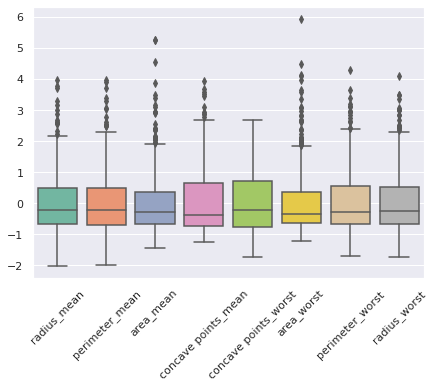

In [67]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

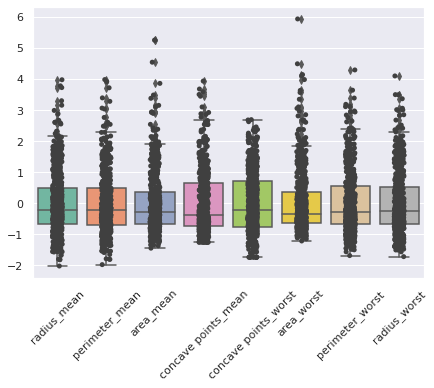

In [68]:
# Use stripplot to show the datapoints on top of the boxes:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

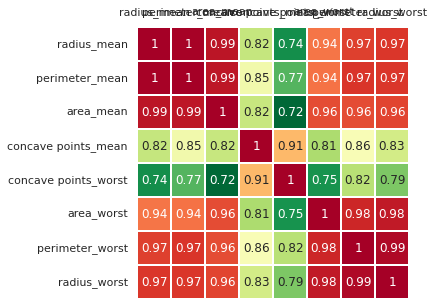

In [69]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

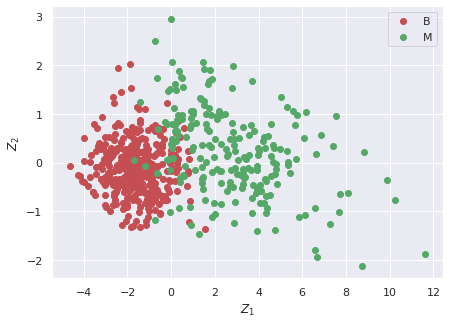

In [70]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(benign)->0,  2(malignant)->1
idx_benign = np.where(y == 0)
idx_malignant = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_benign,0], Z[idx_benign,1], c='r', label='B')
plt.scatter(Z[idx_malignant,0], Z[idx_malignant,1], c='g', label='M')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

In [71]:
#print the transformation matrix A
A = pca.components_.T 
pd.DataFrame(A)

0         1         2         3         4         5         6  \
0  0.361867 -0.228845  0.280318 -0.379576 -0.102182 -0.294077 -0.157309   
1  0.364579 -0.161305  0.309738 -0.314693 -0.132085  0.066478 -0.460086   
2  0.360624 -0.261273  0.285120  0.014106  0.626985  0.235497  0.515999   
3  0.333898  0.519327  0.505117  0.559961 -0.207831 -0.064056  0.023696   
4  0.313541  0.713618 -0.333659 -0.440277  0.294515 -0.020625 -0.010109   
5  0.358526 -0.209062 -0.428166  0.497846  0.357692 -0.140841 -0.493698   
6  0.366762 -0.080715 -0.292958  0.024745 -0.434177  0.737622  0.080880   
7  0.365011 -0.155480 -0.329498  0.028788 -0.364166 -0.534031  0.496364   

          7  
0 -0.687282  
1  0.642299  
2  0.073284  
3 -0.047472  
4  0.001894  
5 -0.071120  
6 -0.182748  
7  0.262702

In [72]:
# print eigenvalues vectors
pd.DataFrame(pca.explained_variance_)

0
0  7.294444
1  0.503048
2  0.117649
3  0.069768
4  0.021429
5  0.005650
6  0.001735
7  0.000362

**Eigenvectors**

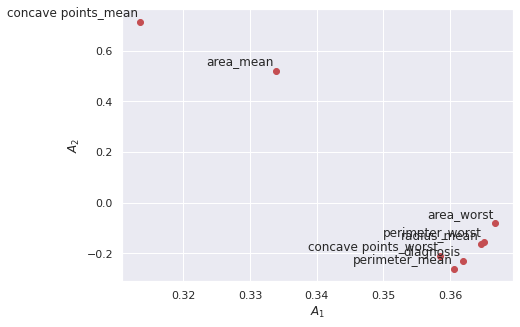

In [73]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


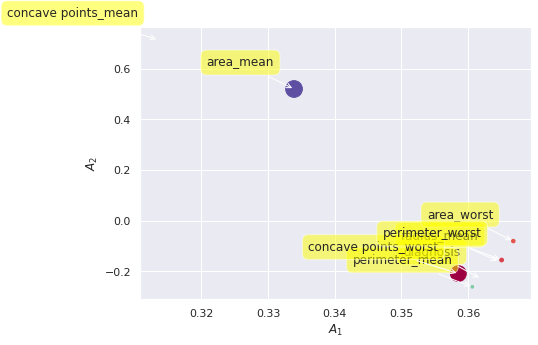

In [74]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

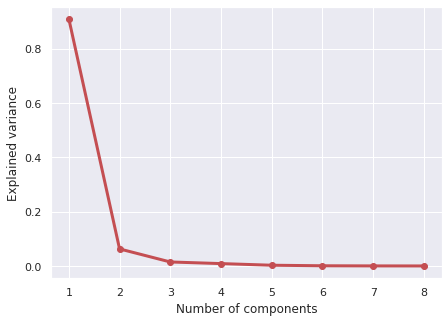

In [75]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

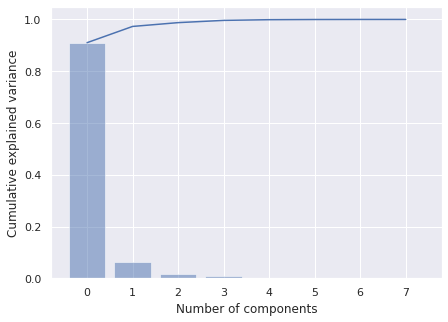

In [76]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

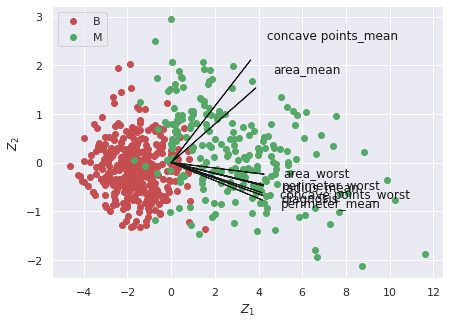

In [77]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_benign,0], Z[idx_benign,1], c='r', label='B')
plt.scatter(Z[idx_malignant,0], Z[idx_malignant,1], c='g', label='M')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

In [79]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [80]:
out['PC']

PC1       PC2
0    5.031507  1.342949
1    4.389011 -0.928886
2    4.566364  0.783303
3    0.005309  2.956814
4    4.047864 -0.467144
..        ...       ...
564  5.705507  0.081662
565  4.098162 -0.587509
566  1.443621 -0.293277
567  5.773031  0.984659
568 -4.196574 -0.282030

[569 rows x 2 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe780886310>)

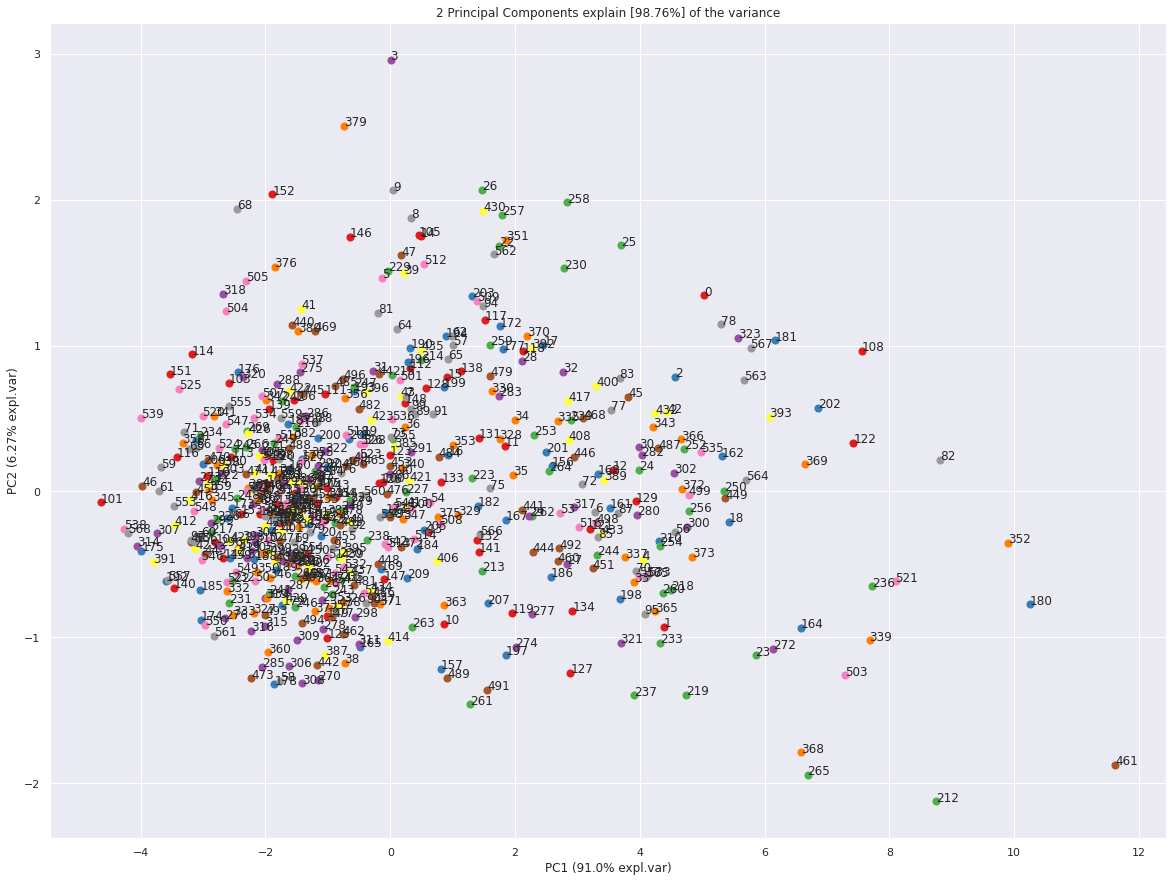

In [81]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [82]:
A = out['loadings'].T

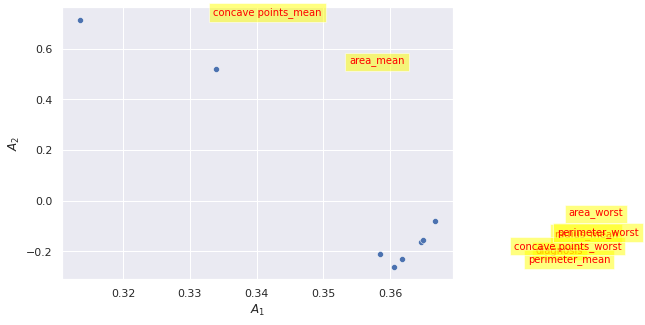

In [83]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

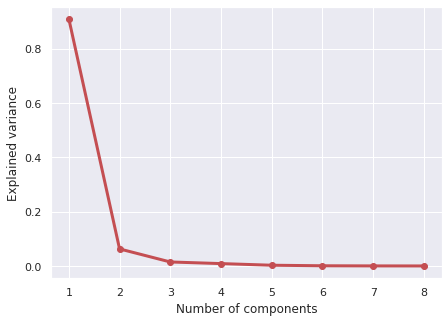

In [84]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

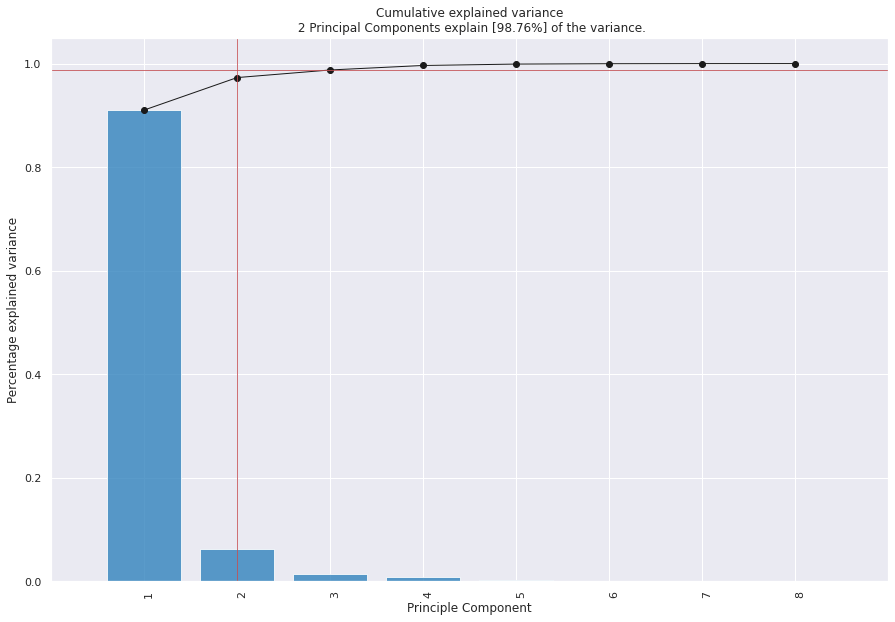

<Figure size 504x360 with 0 Axes>

In [85]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


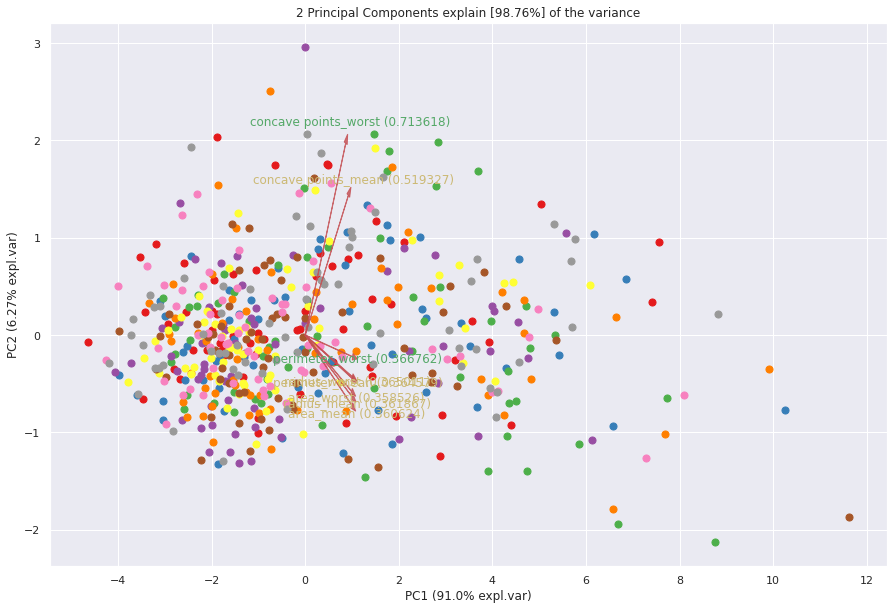

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe77fe12350>)

In [86]:
model.biplot(label=False, legend=False)

#**Classification**

**Using PyCaret**

In [87]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [91]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (512, 9)
Unseen Data For Predictions: (57, 9)


**Setting up the Environment in PyCaret**

In [92]:
from pycaret.classification import *
clf = setup(data=data, target='diagnosis', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type            Binary
3                            Label Encoded    0.0: 0, 1.0: 1
4                            Original Data          (512, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (358, 7)
12                    Transformed Test Set          (154, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f97b
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

**Comparing All Models**

In [93]:
 #show the best model and their statistics
 best_model = compare_models(sort='F1') 

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9638  0.9857  0.9371  0.9732   
lightgbm  Light Gradient Boosting Machine    0.9498  0.9805  0.9371  0.9408   
ada                  Ada Boost Classifier    0.9469  0.9785  0.9367  0.9335   
rf               Random Forest Classifier    0.9441  0.9847  0.9295  0.9368   
qda       Quadratic Discriminant Analysis    0.9440  0.9855  0.9229  0.9429   
lr                    Logistic Regression    0.9385  0.9849  0.9219  0.9337   
dt               Decision Tree Classifier    0.9329  0.9311  0.9229  0.9154   
ridge                    Ridge Classifier    0.9385  0.0000  0.8800  0.9652   
lda          Linear Discriminant Analysis    0.9386  0.9906  0.8667  0.9795   
gbc          Gradient Boosting Classifier    0.9300  0.9823  0.9162  0.9157   
knn                K Neighbors Classifier    0.9273  0.9640  0.9010  0.9206   
nb                            Naive Bayes    0.9217  0.9856  0.8729  0.9374   
svm                   SVM - Linear Kernel    0.9190  0.0000  0.8729  0.9318   
dummy                    Dummy Classifier    0.6033  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.9530  0.9237  0.9263     0.470  
lightgbm  0.9376  0.8956  0.8973     0.085  
ada       0.9336  0.8893  0.8913     0.122  
rf        0.9299  0.8836  0.8878     0.516  
qda       0.9297  0.8833  0.8872     0.018  
lr        0.9232  0.8722  0.8781     0.392  
dt        0.9170  0.8607  0.8636     0.018  
ridge     0.9168  0.8685  0.8745     0.017  
lda       0.9160  0.8683  0.8758     0.017  
gbc       0.9136  0.8550  0.8580     0.118  
knn       0.9080  0.8480  0.8512     0.122  
nb        0.8969  0.8344  0.8437     0.018  
svm       0.8955  0.8298  0.8374     0.016  
dummy     0.0000  0.0000  0.0000     0.014

In [94]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**


For the remaining part of this tutorial, we will work with the below models as our candidate models.

* Decision Tree Classifier ('dt')
* Random Forest Classifier


**Create Decision Tree Classifier**

In [95]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9722  0.9643  0.9286  1.0000  0.9630  0.9408  0.9424
1       0.9444  0.9286  0.8571  1.0000  0.9231  0.8800  0.8864
2       0.9167  0.9188  0.9286  0.8667  0.8966  0.8269  0.8283
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8889  0.8961  0.9286  0.8125  0.8667  0.7722  0.7772
5       0.9444  0.9416  0.9286  0.9286  0.9286  0.8831  0.8831
6       0.8889  0.8857  0.8667  0.8667  0.8667  0.7714  0.7714
7       0.9444  0.9429  0.9333  0.9333  0.9333  0.8857  0.8857
8       0.9143  0.9286  1.0000  0.8235  0.9032  0.8276  0.8402
9       0.9143  0.9048  0.8571  0.9231  0.8889  0.8193  0.8208
Mean    0.9329  0.9311  0.9229  0.9154  0.9170  0.8607  0.8636
SD      0.0336  0.0320  0.0489  0.0677  0.0399  0.0686  0.0677

In [96]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:**

**Tune Decision Tree Model**

In [97]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9722  0.9627  0.9286  1.0000  0.9630  0.9408  0.9424
1       0.9167  0.9237  0.7857  1.0000  0.8800  0.8176  0.8315
2       0.8889  0.9497  0.9286  0.8125  0.8667  0.7722  0.7772
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9167  0.9724  1.0000  0.8235  0.9032  0.8312  0.8433
5       0.9722  1.0000  0.9286  1.0000  0.9630  0.9408  0.9424
6       0.9167  0.9238  0.8667  0.9286  0.8966  0.8269  0.8283
7       0.9722  0.9746  1.0000  0.9375  0.9677  0.9434  0.9449
8       0.9429  0.9728  1.0000  0.8750  0.9333  0.8837  0.8898
9       0.9429  0.9932  0.9286  0.9286  0.9286  0.8810  0.8810
Mean    0.9441  0.9673  0.9367  0.9306  0.9302  0.8838  0.8881
SD      0.0329  0.0265  0.0663  0.0692  0.0411  0.0681  0.0654

In [98]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [100]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest  Model**

In [101]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9722  0.9545  0.9286  1.0000  0.9630  0.9408  0.9424
1       0.9167  0.9935  0.7857  1.0000  0.8800  0.8176  0.8315
2       0.8889  0.9367  0.8571  0.8571  0.8571  0.7662  0.7662
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8889  0.9919  1.0000  0.7778  0.8750  0.7778  0.7977
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.9905  0.8667  0.9286  0.8966  0.8269  0.8283
7       0.9722  0.9968  1.0000  0.9375  0.9677  0.9434  0.9449
8       0.9143  0.9830  0.9286  0.8667  0.8966  0.8235  0.8250
9       0.9714  1.0000  0.9286  1.0000  0.9630  0.9398  0.9415
Mean    0.9441  0.9847  0.9295  0.9368  0.9299  0.8836  0.8878
SD      0.0413  0.0206  0.0705  0.0752  0.0514  0.0856  0.0824

**Tune Random Forest  Model**

In [103]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9444  0.9627  0.9286  0.9286  0.9286  0.8831  0.8831
1       0.9167  0.9805  0.7857  1.0000  0.8800  0.8176  0.8315
2       0.9444  0.9562  0.9286  0.9286  0.9286  0.8831  0.8831
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8889  0.9870  0.9286  0.8125  0.8667  0.7722  0.7772
5       0.9722  1.0000  0.9286  1.0000  0.9630  0.9408  0.9424
6       0.9167  0.9524  0.8667  0.9286  0.8966  0.8269  0.8283
7       0.9722  0.9746  1.0000  0.9375  0.9677  0.9434  0.9449
8       0.9143  0.9643  0.9286  0.8667  0.8966  0.8235  0.8250
9       0.9714  0.9932  1.0000  0.9333  0.9655  0.9412  0.9428
Mean    0.9441  0.9771  0.9295  0.9336  0.9293  0.8832  0.8858
SD      0.0330  0.0169  0.0629  0.0570  0.0417  0.0688  0.0669

**Evaluate Random Forest Model**

In [106]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [107]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9722  0.9675  0.9286  1.0000  0.9630  0.9408  0.9424
1       0.9167  1.0000  0.7857  1.0000  0.8800  0.8176  0.8315
2       0.9167  0.9448  0.9286  0.8667  0.8966  0.8269  0.8283
3       0.9722  1.0000  1.0000  0.9333  0.9655  0.9423  0.9439
4       0.9167  0.9968  1.0000  0.8235  0.9032  0.8312  0.8433
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.9937  0.8667  0.9286  0.8966  0.8269  0.8283
7       0.9722  1.0000  1.0000  0.9375  0.9677  0.9434  0.9449
8       0.9143  0.9932  0.9286  0.8667  0.8966  0.8235  0.8250
9       0.9714  1.0000  0.9286  1.0000  0.9630  0.9398  0.9415
Mean    0.9469  0.9896  0.9367  0.9356  0.9332  0.8892  0.8929
SD      0.0317  0.0176  0.0663  0.0622  0.0403  0.0662  0.0639

In [108]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [109]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [110]:
clf_pca = setup(data=data, target='diagnosis', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type            Binary
3                            Label Encoded    0.0: 0, 1.0: 1
4                            Original Data          (512, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (358, 2)
12                    Transformed Test Set          (154, 2)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2d16
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 2
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [111]:
#show the best model and their statistics
best_model_pca = compare_models(sort='F1')

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9526  0.9876  0.9362  0.9492   
knn                K Neighbors Classifier    0.9442  0.9704  0.9290  0.9382   
gbc          Gradient Boosting Classifier    0.9387  0.9820  0.9224  0.9322   
rf               Random Forest Classifier    0.9359  0.9880  0.9295  0.9241   
ada                  Ada Boost Classifier    0.9359  0.9819  0.9081  0.9399   
nb                            Naive Bayes    0.9355  0.9860  0.9014  0.9376   
lr                    Logistic Regression    0.9301  0.9876  0.9019  0.9288   
qda       Quadratic Discriminant Analysis    0.9327  0.9840  0.8943  0.9376   
dt               Decision Tree Classifier    0.9302  0.9250  0.9010  0.9305   
lightgbm  Light Gradient Boosting Machine    0.9276  0.9841  0.9014  0.9244   
svm                   SVM - Linear Kernel    0.9217  0.0000  0.9152  0.9036   
ridge                    Ridge Classifier    0.9272  0.0000  0.8524  0.9647   
lda          Linear Discriminant Analysis    0.9272  0.9848  0.8524  0.9647   
dummy                    Dummy Classifier    0.6033  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.9372  0.8995  0.9054     0.472  
knn       0.9273  0.8824  0.8893     0.115  
gbc       0.9223  0.8720  0.8781     0.091  
rf        0.9192  0.8666  0.8756     0.497  
ada       0.9156  0.8646  0.8732     0.115  
nb        0.9154  0.8636  0.8681     0.017  
lr        0.9105  0.8534  0.8590     0.020  
qda       0.9104  0.8570  0.8627     0.017  
dt        0.9087  0.8528  0.8606     0.015  
lightgbm  0.9061  0.8477  0.8554     0.073  
svm       0.9029  0.8377  0.8455     0.015  
ridge     0.8986  0.8431  0.8527     0.015  
lda       0.8986  0.8431  0.8527     0.017  
dummy     0.0000  0.0000  0.0000     0.014

In [112]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune the Best Model**

In [113]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9722  0.9773  0.9286  1.0000  0.9630  0.9408  0.9424
1       0.8889  1.0000  0.7143  1.0000  0.8333  0.7534  0.7774
2       0.9167  0.9481  0.9286  0.8667  0.8966  0.8269  0.8283
3       0.9722  1.0000  1.0000  0.9333  0.9655  0.9423  0.9439
4       0.9444  0.9805  1.0000  0.8750  0.9333  0.8861  0.8919
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.9778  0.8667  0.9286  0.8966  0.8269  0.8283
7       0.9722  0.9937  1.0000  0.9375  0.9677  0.9434  0.9449
8       0.9143  0.9830  0.9286  0.8667  0.8966  0.8235  0.8250
9       0.9429  1.0000  0.8571  1.0000  0.9231  0.8780  0.8847
Mean    0.9440  0.9860  0.9224  0.9408  0.9276  0.8821  0.8867
SD      0.0331  0.0157  0.0865  0.0544  0.0462  0.0713  0.0672

In [114]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [115]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

In [117]:
import shap

In [118]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9722  0.9545  0.9286  1.0000  0.9630  0.9408  0.9424
1       0.8611  0.9968  0.6429  1.0000  0.7826  0.6875  0.7237
2       0.9167  0.9708  0.9286  0.8667  0.8966  0.8269  0.8283
3       0.9722  1.0000  1.0000  0.9333  0.9655  0.9423  0.9439
4       0.8333  0.9805  1.0000  0.7000  0.8235  0.6747  0.7135
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9167  0.9873  0.8667  0.9286  0.8966  0.8269  0.8283
7       0.9722  0.9937  1.0000  0.9375  0.9677  0.9434  0.9449
8       0.9429  0.9966  1.0000  0.8750  0.9333  0.8837  0.8898
9       0.9714  1.0000  0.9286  1.0000  0.9630  0.9398  0.9415
Mean    0.9359  0.9880  0.9295  0.9241  0.9192  0.8666  0.8756
SD      0.0512  0.0144  0.1053  0.0890  0.0663  0.1061  0.0937

In [119]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9722  0.9627  0.9286  1.0000  0.9630  0.9408  0.9424
1       0.8611  0.9643  0.6429  1.0000  0.7826  0.6875  0.7237
2       0.9444  0.9123  0.8571  1.0000  0.9231  0.8800  0.8864
3       0.9722  1.0000  0.9286  1.0000  0.9630  0.9408  0.9424
4       0.8889  0.9773  1.0000  0.7778  0.8750  0.7778  0.7977
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9444  0.9873  0.8667  1.0000  0.9286  0.8835  0.8896
7       0.9722  0.9746  1.0000  0.9375  0.9677  0.9434  0.9449
8       0.9714  0.9915  1.0000  0.9333  0.9655  0.9412  0.9428
9       0.9714  0.9490  0.9286  1.0000  0.9630  0.9398  0.9415
Mean    0.9498  0.9719  0.9152  0.9649  0.9331  0.8935  0.9012
SD      0.0407  0.0254  0.1045  0.0674  0.0596  0.0888  0.0781

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

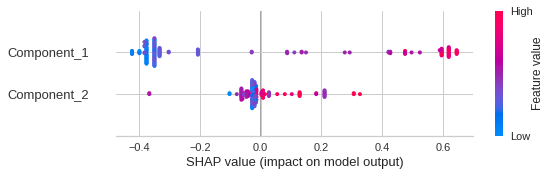

In [120]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a single prediction**

In [121]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [122]:
interpret_model(tuned_rf_pca, plot='reason')

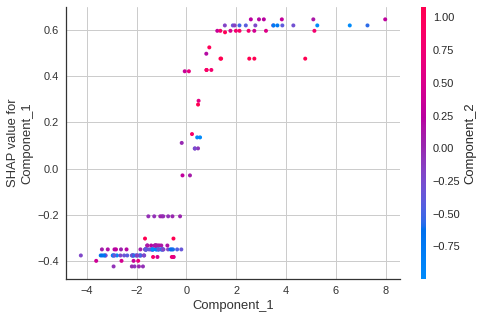

In [123]:
interpret_model(tuned_rf_pca, plot='correlation')